In [203]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import classification_report, accuracy_score, recall_score

plt.rc('figure', autolayout=True)
plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=14,
    titlepad=10
)
%matplotlib inline

In [204]:
df = pd.read_csv('breast-cancer.csv', sep=',')

In [205]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [206]:
df.shape

(569, 32)

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [208]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [209]:
#Checagem para valores duplicados
df.duplicated().any()

False

In [210]:
df = df.drop(columns='id')

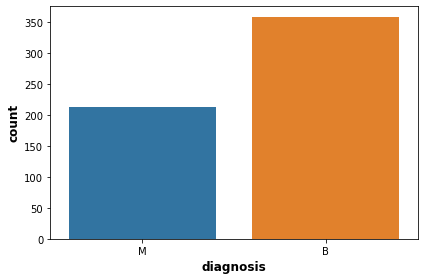

In [211]:
sns.countplot(x='diagnosis', data=df)

In [212]:
df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000
fractal_dimension_mean,569.000000,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.097440


In [213]:
df['diagnosis'] = df['diagnosis'].map({'M':0, 'B':1}).astype(int)

In [214]:
df.corr().style.background_gradient()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,-0.330499,0.012838,-0.567134,0.008303,-0.556141,-0.548236,0.067016,-0.292999,-0.253730,-0.408042,0.006522,-0.077972,-0.776454,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294,-0.323872
radius_mean,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


**Os valores mais escuros mostram alta correlação entre variáveis, indicando uma possível maior relevância entre elas para o treinamento dos modelos de aprendizado de máquina.**

## Pré-processamento dos dados

In [215]:
x = df.drop(columns = 'diagnosis')
y = df['diagnosis']

In [216]:
discrete_features = x.dtypes == int

In [217]:
def make_mi_scores(x, y, discrete_features):
    mi_scores = mutual_info_classif(x, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name='MI scores', index=x.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(x, y, discrete_features)
mi_scores

perimeter_worst            0.477144
area_worst                 0.463405
radius_worst               0.452297
concave points_mean        0.439054
concave points_worst       0.437320
perimeter_mean             0.404523
concavity_mean             0.375637
radius_mean                0.364968
area_mean                  0.361055
area_se                    0.341230
concavity_worst            0.315123
perimeter_se               0.273597
radius_se                  0.248558
compactness_worst          0.226177
compactness_mean           0.215540
concave points_se          0.128094
texture_worst              0.122709
concavity_se               0.118849
smoothness_worst           0.101469
texture_mean               0.098075
symmetry_worst             0.091788
smoothness_mean            0.078603
compactness_se             0.075594
fractal_dimension_worst    0.063472
symmetry_mean              0.059123
fractal_dimension_se       0.038746
smoothness_se              0.014620
symmetry_se                0

In [218]:
def drop_uniform(df, mi_scores):    
    return df.loc[:, mi_scores > 0.2]

x = drop_uniform(x, mi_scores)

**O valor de corte > 0.2 foi escolhido sem um critério aprofundado, onde o que se busca são as variáveis com uma elevada correlação e este método mostrou-se apto para este tipo de filtragem.**

In [219]:
x.head()

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,17.99,122.80,1001.0,0.27760,0.3001,0.14710,1.0950,8.589,153.40,25.38,184.60,2019.0,0.6656,0.7119,0.2654
1,20.57,132.90,1326.0,0.07864,0.0869,0.07017,0.5435,3.398,74.08,24.99,158.80,1956.0,0.1866,0.2416,0.1860
2,19.69,130.00,1203.0,0.15990,0.1974,0.12790,0.7456,4.585,94.03,23.57,152.50,1709.0,0.4245,0.4504,0.2430
3,11.42,77.58,386.1,0.28390,0.2414,0.10520,0.4956,3.445,27.23,14.91,98.87,567.7,0.8663,0.6869,0.2575
4,20.29,135.10,1297.0,0.13280,0.1980,0.10430,0.7572,5.438,94.44,22.54,152.20,1575.0,0.2050,0.4000,0.1625


In [220]:
x.shape

(569, 15)

## Treinamento dos modelos

In [221]:
# Listas que guardarão os dados de acurácia e recuperação de cada modelo
models, acc, rec = [], [], []

#### Regressão logistíca

In [222]:
lr = LogisticRegression()
lr.fit(x, y)

pred_lr = cross_val_predict(estimator=lr, X = x, y = y, cv = 5)
models.append('Logistic Regression')
acc.append(accuracy_score(y, pred_lr))
rec.append(recall_score(y, pred_lr))
print('Classification report: \n', classification_report(y, pred_lr))

C:\Users\Caio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Caio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       212
           1       0.95      0.97      0.96       357

    accuracy                           0.95       569
   macro avg       0.95      0.94      0.94       569
weighted avg       0.95      0.95      0.95       569



C:\Users\Caio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### KNN

In [223]:
knn = KNeighborsClassifier()
knn.fit(x, y)

pred_knn = cross_val_predict(estimator=knn, X = x, y = y, cv = 5)
models.append('KNN')
acc.append(accuracy_score(y, pred_knn))
rec.append(recall_score(y, pred_knn))
print('Classification report: /n', classification_report(y, pred_knn))

Classification report: /n               precision    recall  f1-score   support

           0       0.93      0.86      0.89       212
           1       0.92      0.96      0.94       357

    accuracy                           0.92       569
   macro avg       0.93      0.91      0.92       569
weighted avg       0.92      0.92      0.92       569



#### K-Means

In [224]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(x, y)

pred_kmeans = cross_val_predict(estimator=kmeans, X = x, y = y, cv = 5)
models.append('K-Means')
acc.append(accuracy_score(y, pred_kmeans))
rec.append(recall_score(y, pred_kmeans))
print('CLassification report: \n', classification_report(y, pred_kmeans))

CLassification report: 
               precision    recall  f1-score   support

           0       0.26      0.46      0.33       212
           1       0.43      0.24      0.31       357

    accuracy                           0.32       569
   macro avg       0.35      0.35      0.32       569
weighted avg       0.37      0.32      0.32       569



#### Naive-Bayes

In [225]:
nb1 = GaussianNB()
nb1.fit(x, y)

pred_nb1 = cross_val_predict(estimator=nb, X = x, y = y, cv = 5)
models.append('GaussianNB')
acc.append(accuracy_score(y, pred_nb1))
rec.append(recall_score(y, pred_nb1))
print('Classification report: \n', classification_report(y, pred_nb1))

Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.77      0.86       212
           1       0.88      0.99      0.93       357

    accuracy                           0.91       569
   macro avg       0.93      0.88      0.90       569
weighted avg       0.92      0.91      0.91       569



#### Decision Tree

In [226]:
d_t = dtc()
d_t.fit(x, y)

pred_dtc = cross_val_predict(estimator=d_t, X = x, y = y, cv = 5)
models.append('Decision Tree')
acc.append(accuracy_score(y, pred_dtc))
rec.append(recall_score(y, pred_dtc))
print('Classification report: \n', classification_report(y, pred_dtc))

Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       212
           1       0.94      0.94      0.94       357

    accuracy                           0.92       569
   macro avg       0.92      0.92      0.92       569
weighted avg       0.92      0.92      0.92       569



#### Random Forest

In [227]:
r_f = rfc()
r_f.fit(x, y)

pred_rfc = cross_val_predict(estimator=r_f, X = x, y = y, cv=5)
models.append('Random Forest')
acc.append(accuracy_score(y, pred_rfc))
rec.append(recall_score(y, pred_rfc))
print('Classification report: \n', classification_report(y, pred_rfc))

Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       212
           1       0.95      0.96      0.95       357

    accuracy                           0.94       569
   macro avg       0.94      0.94      0.94       569
weighted avg       0.94      0.94      0.94       569



### Comparação de algumas métricas

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

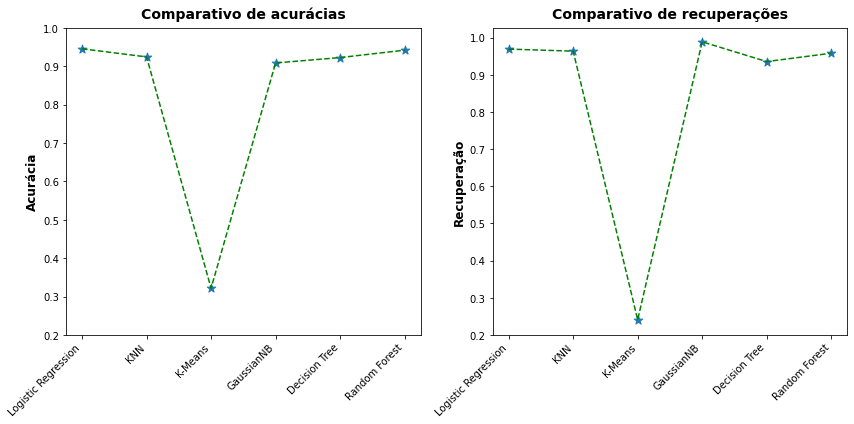

In [228]:
plt.figure(figsize= ((12,6)))

plt.subplot(1, 2, 1)
plt.scatter(models, acc, marker = '*', s=80)
plt.plot(models, acc, 'b--', color='green')
plt.title('Comparativo de acurácias')
plt.ylabel('Acurácia')
plt.yticks(np.arange(0.2, 1.01, 0.1))
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.scatter(models, rec, marker = '*', s=80)
plt.plot(models, rec, 'b--', color='green')
plt.title('Comparativo de recuperações')
plt.ylabel('Recuperação')
plt.yticks(np.arange(0.2, 1.01, 0.1))
plt.xticks(rotation=45, ha='right')

### Conclusões
- O modelo simples de regreção logística foi capaz de apresentar elevados valores de acurácia e recuperação, mostrando-se útil para a predição neste tipo de sistema.
- O modelo baseado em Naive-Bayes (GaussianNB) foi o que mostrou as melhores métricas de acurácia e recuperação quando comparados com os outros modelos. Porém, é importante lembrar que não houve uma otimização dos outros modelos, podendo isso alterar qual seria o modelo mais apto.
- O modelo baseado em K-means foi o que mostrou as piores métricas quando comparado com os demais.